In [32]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict
from dotenv import load_dotenv

In [35]:
load_dotenv()

True

In [36]:
!pip install langchain-google-genai

  Using cached langchain_google_genai-2.1.8-py3-none-any.whl.metadata (7.0 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
  Using cached google_api_core-2.25.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached google_auth-2.40.3-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached googleapis_common_protos-1.70.0-py3-none-any.whl.metadata (9.3 kB)
  Using cached grpcio-1.74.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached grpcio_status-1.74.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metada


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash") 

In [38]:
# create  a state 
class LLMState(TypedDict):
    question: str
    answer: str

In [39]:
def llm_qa(state: LLMState) -> LLMState:
    # extract the question from the state
    question = state['question']

    # form a prompt 
    prompt = f"Answer the following question: {question}"

    # as that question to the LLM
    answer = model.invoke(prompt).content
    # Update the answer in the state
    state['answer'] = answer
    return state

In [40]:
# create a Graph

graph = StateGraph(LLMState)

#add node
graph.add_node("llm_qa" , llm_qa)

# add edges
graph.add_edge(START, "llm_qa")

# add edges
graph.add_edge("llm_qa", END)

# Compile the graph
workflow = graph.compile()

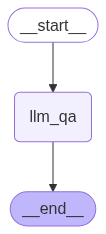

In [42]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [41]:
# execute 
initial_state = {'question': 'How far is moon from the earth?'}

final_state = workflow.invoke(initial_state)

print(final_state ['answer'])

The distance between the Earth and the Moon varies because the Moon's orbit is not perfectly circular.  The average distance is about **238,855 miles (384,400 kilometers)**.
